In [1]:
import numpy as np 
import pandas as pd 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold, train_test_split
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import seaborn as sns 

# Plotly 
import plotly.express as px 
import plotly.graph_objects as go 
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf
init_notebook_mode(connected=True)

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, word_tokenize

from collections import defaultdict

from lazypredict.Supervised import LazyClassifier

import imblearn

In [2]:
df = pd.read_csv('../data/processed/tanishq_data_clean_labelled.csv')
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1)
lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer()
df['clean_tweet_token'] = df['clean_tweet_segmented'].apply(lemmatizer.lemmatize).apply(tokenizer.tokenize)
df['clean_tweet_token'] = df['clean_tweet_token'].str.join(' ')
df = df[['clean_tweet_token', 'sentiment']]
df.dropna(inplace=True)
df = df[df['sentiment'].isin([0.0, 4.0])]
df['sentiment'] = df['sentiment'].replace({4.0: 1})

In [3]:
count_vec = CountVectorizer()
X_count_vec = count_vec.fit_transform(df['clean_tweet_token'])
y = df['sentiment'].values 
X_train, X_test, y_train, y_test = train_test_split(X_count_vec, y, test_size=0.25)

In [4]:
def process_smote(X=None, y=None, sampling=None):
    X, y = sampling.fit_resample(X, y)
    pca = PCA(n_components=2).fit_transform(X.toarray())
    df = pd.DataFrame(pca)
    df.columns = ['X1', 'X2']
    df['labels'] = y
    return X, y, df

[Text(0.5, 1.0, 'Cluster visaliztion in the first two principal component domain')]

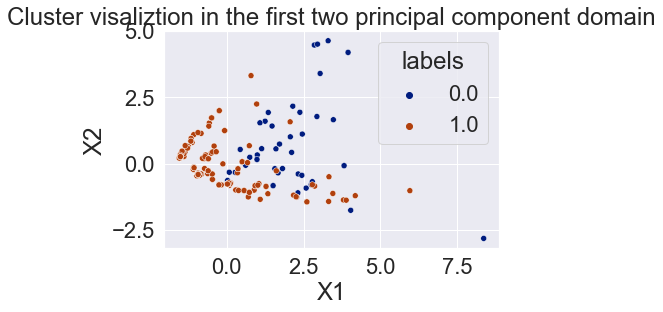

In [5]:
# SMOTEENN
sampling = imblearn.combine.SMOTEENN()
X_smoteenn, y_smoteenn, df_smoteenn = process_smote(X=X_train, y=y_train, sampling=sampling) 
sns.set(font_scale=2)
ax = sns.scatterplot(x='X1', y='X2', hue='labels', 
    data=df_smoteenn, palette="dark")
ax.set(title="Cluster visaliztion in the first two principal component domain")

In [6]:
def process_lazypredict(X_train=None, y_train=None, X_test=None, y_test=None):
    clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    return models

In [14]:
X_test

<92x1657 sparse matrix of type '<class 'numpy.int64'>'
	with 2116 stored elements in Compressed Sparse Row format>

In [15]:
models_smoteenn = process_lazypredict(X_train=X_smoteenn.toarray(), 
    y_train=y_smoteenn, X_test=X_test.toarray(), y_test=y_test)

100%|██████████| 30/30 [00:03<00:00,  9.09it/s]


In [16]:
models_smoteenn

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.71,0.85,0.85,0.81,0.10
DecisionTreeClassifier,0.70,0.84,0.84,0.80,0.05
ExtraTreesClassifier,0.64,0.82,0.82,0.76,0.16
Perceptron,0.59,0.79,0.79,0.72,0.05
RandomForestClassifier,0.46,0.72,0.72,0.60,0.18
SGDClassifier,0.39,0.69,0.69,0.54,0.06
RidgeClassifier,0.36,0.67,0.67,0.50,0.06
RidgeClassifierCV,0.35,0.67,0.67,0.49,0.07
LogisticRegression,0.32,0.65,0.65,0.45,0.26


In [17]:
fig = px.bar(models_smoteenn.reset_index(), x='Model', y='ROC AUC', color='Model', color_discrete_sequence=px.colors.qualitative.Dark24_r)
fig.show()